In [1]:
# Import the necessary libraries for Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset

uber = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Uber Sep-14 Dataset/uber-raw-data-sep14.csv')
uber.head(10)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [3]:
# Info of the dataset

uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [4]:
# Check for null values

uber.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
# Check for missing or na values

uber.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [6]:
# Extract additional information from the dataset

uber['Date/Time'] = pd.to_datetime(uber['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
uber['day_of_the_week_num'] = uber['Date/Time'].dt.dayofweek
uber['day_of_the_week'] = uber['Date/Time'].dt.day_name()
uber['day_num'] = uber['Date/Time'].dt.day
uber['hour_of_day'] = uber['Date/Time'].dt.hour


In [7]:
# Display the head of the dataset

uber.head()

,Date/Time,Lat,Lon,Base,day_of_the_week_num,day_of_the_week,day_num,hour_of_day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,1,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,1,0


In [8]:
# Display the shape

uber.shape

(1028136, 8)

In [9]:
# Unique base codes

uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

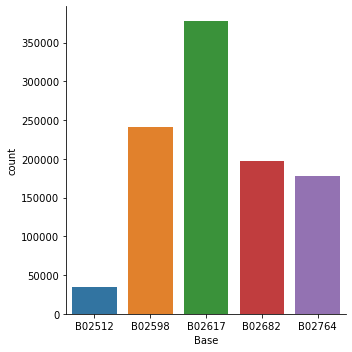

In [10]:
# Total rides based on the base code

sns.catplot(x = 'Base', data = uber, kind = 'count');

In [11]:
# Pivot Tables for total rides each day

uber_week_data = uber.pivot_table(index = ['day_of_the_week_num', 'day_of_the_week'], values = 'Base', aggfunc = 'count')
uber_week_data

,,Base
day_of_the_week_num,day_of_the_week,
0,Monday,137288
1,Tuesday,163230
2,Wednesday,135373
3,Thursday,153276
4,Friday,160380
5,Saturday,162057
6,Sunday,116532


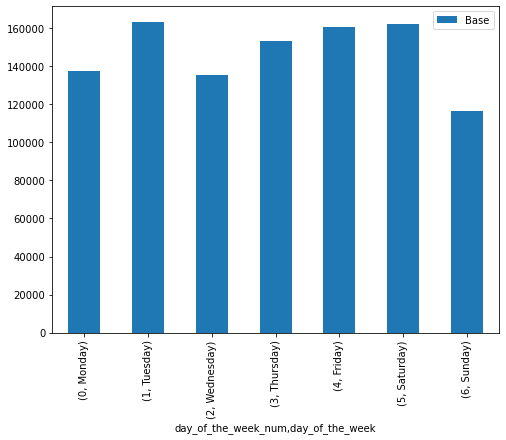

In [12]:
# Bar plot for the pivot table

uber_week_data.plot(kind = 'bar', figsize = (8,6));

In [13]:
# Pivot Tables for total rides on hourly basis

uber_hourly_data = uber.pivot_table(index = ['hour_of_day'], values = 'Base', aggfunc = 'count')
uber_hourly_data


,Base
hour_of_day,
0,24133
1,16107
2,10702
3,10789
4,12675
5,20262
6,33307
7,43314
8,44477


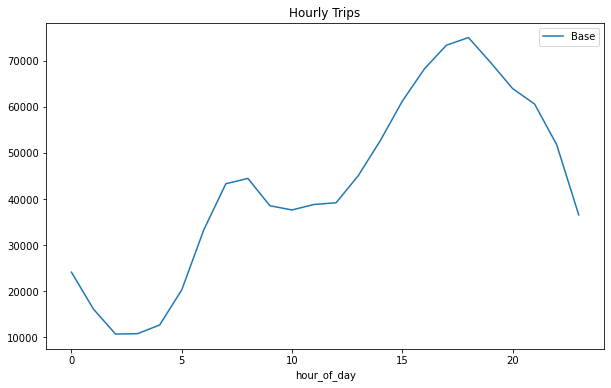

In [14]:
# Line plot for the pivot table

uber_hourly_data.plot(kind = 'line', figsize = (10,6), title = 'Hourly Trips');

In [15]:
# Pivot table for total rides each day

uber_day_data = uber.pivot_table(index = ['day_num'], values = 'Base', aggfunc = 'count')
uber_day_data

,Base
day_num,
1,19961
2,28831
3,32631
4,38360
5,42319
6,40520
7,30134
8,30360
9,34560


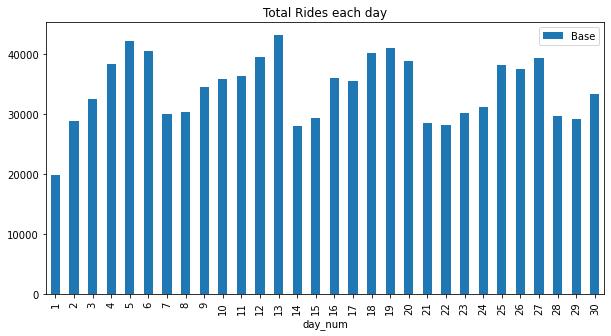

In [16]:
# Bar plot for the pivot table

uber_day_data.plot(kind = 'bar', figsize = (10,5), title = 'Total Rides each day');

In [17]:
# Another method for finding the total rides each day

def count_rows(rows):
    return len(rows)

by_date = uber.groupby('day_num').apply(count_rows)
by_date

day_num
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

In [18]:
# Sort Day of the month by values in ascending order rather than date

by_date_sorted = by_date.sort_values()
by_date_sorted

day_num
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

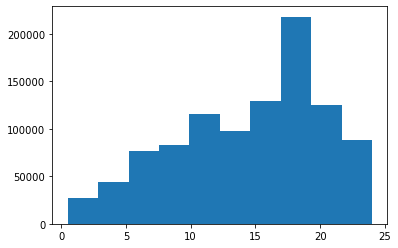

In [19]:
# Analyze the Hourly rides by histogram

plt.hist(uber.hour_of_day, bins = 10, range = (0.5,24));

In [20]:
# Create a cross table to analyze uber rider based on hour of day and Day of the week

count_rows(uber)
by_hour_weekday = uber.groupby('hour_of_day day_of_the_week_num'.split()).apply(count_rows).unstack()
by_hour_weekday

day_of_the_week_num,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0,1885,1411,1489,1762,2513,6909,8164
1,1201,784,885,1037,1530,4737,5933
2,977,609,597,714,1002,2957,3846
3,1780,1221,966,1088,1347,2029,2358
4,2479,2093,1612,1720,1819,1458,1494
5,3905,4196,3130,2754,3115,1544,1618
6,5668,7393,5699,5586,5186,2092,1683
7,7223,9466,7067,7790,6698,2790,2280
8,7287,9374,6665,7663,6715,3664,3109


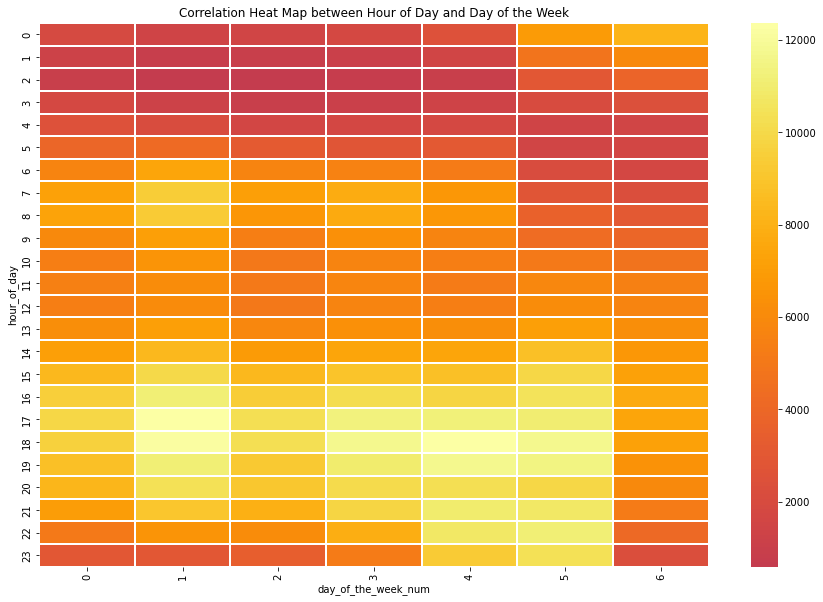

In [21]:
# Correlation Map/ Heat Map to analyze the rides based on day/hour and day of week
plt.figure(figsize = (15,10))
heatmap = sns.heatmap(by_hour_weekday, fmt = '.1g', center = 0, cmap = 'inferno', lw = 2)
heatmap.set_title('Correlation Heat Map between Hour of Day and Day of the Week')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90);